# B0822012邱元肇 樣形識別HW5

**作業要求:**

上傳第五週回去自己試跑的程式與筆記就可以了

**原始程式碼來源:**

https://github.com/fchollet/deep-learning-with-python-notebooks

chapter05_fundamentals-of-ml.ipynb


**本章摘要**
* 模型訓練上的原理與細節
  * 加入白噪音對mnist數據準確度的影響(會降低。可取前10000高頻率字詞訓練避免極端偏差)
  * 任意訓練資料模型都能嘗試擬合(但準確度高不代表泛化性佳，故仍需以測試資料評估)
* 模型達不到最佳結果
  * 設置過高學習率(無法達成理想結果)=>應適當設置
  * 模型達不到最佳擬合結果(連過度擬合都沒出現)=>增大模型結構複雜度或神經元，使其存儲更多訊息
* 對抗過度擬合
  * 縮小模型體積(延緩過度擬合時間，並減緩泛化下降程度)
  * 權重正則化：使用L1或L2，以權重納入損失函數之方式限制權重上下限
  * Dropout層(取用一定比例的數據將其初始化，使數據增添隨機性)

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

**讀取mnist數據集，並加入噪音**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# 噪音
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# 零噪音
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_images_with_noise_channels

array([[0.        , 0.        , 0.        , ..., 0.96498778, 0.67332145,
        0.52829696],
       [0.        , 0.        , 0.        , ..., 0.78744225, 0.61874876,
        0.85970177],
       [0.        , 0.        , 0.        , ..., 0.68470674, 0.11706191,
        0.42525545],
       ...,
       [0.        , 0.        , 0.        , ..., 0.43851895, 0.85692664,
        0.89222317],
       [0.        , 0.        , 0.        , ..., 0.81975925, 0.58491714,
        0.29321799],
       [0.        , 0.        , 0.        , ..., 0.00842105, 0.70057481,
        0.25990934]])

In [ ]:
train_images_with_zeros_channels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.6340 - accuracy: 0.8116 - val_loss: 0.2854 - val_accuracy: 0.9154
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2474 - accuracy: 0.9239 - val_loss: 0.1787 - val_accuracy: 0.9455
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.9500 - val_loss: 0.1408 - val_accuracy: 0.9577
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1152 - accuracy: 0.9644 - val_loss: 0.1310 - val_accuracy: 0.9607
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9736 - val_loss: 0.1479 - val_accuracy: 0.9596
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0616 - accuracy: 0.9797 - val_loss: 0.1439 - val_accuracy: 0.9585
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.1206 - val_accuracy: 0.9680
Epoch 

**Plotting a validation accuracy comparison**

**繪圖後發現，加入噪音的數據使最終訓練準確率降低，因為噪音本身提供了部分錯誤的相關性訊息使其擬合無法完全理想。此外，CH4在一開始挑出10000的最高頻率出現的單字，也是為了避免訊息資訊的偏差。**

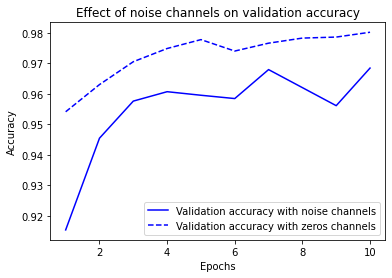

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

**使用完全隨機之標籤訓練資料，仍有不差的訓練準確率，是因為模型能自行尋找訓練數據集的規律；但驗證準確率極糟，因為模型早已過度擬合，泛化性亦極差**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3189 - accuracy: 0.1026 - val_loss: 2.3067 - val_accuracy: 0.0978
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1159 - val_loss: 2.3115 - val_accuracy: 0.1040
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2924 - accuracy: 0.1242 - val_loss: 2.3192 - val_accuracy: 0.0972
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2792 - accuracy: 0.1376 - val_loss: 2.3278 - val_accuracy: 0.1037
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2614 - accuracy: 0.1530 - val_loss: 2.3378 - val_accuracy: 0.0993
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2407 - accuracy: 0.1674 - val_loss: 2.3454 - val_accuracy: 0.1028
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2166 - accuracy: 0.1811 - val_loss: 2.3638 - val_accuracy: 0.1031

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

**不當的參數設定會使模型訓練無法達成理想結果，如：學習率設置過高。**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # 學習率 1 (過高)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 806.3513 - accuracy: 0.3910 - val_loss: 3.0697 - val_accuracy: 0.3219
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.8888 - accuracy: 0.2769 - val_loss: 2.5701 - val_accuracy: 0.2923
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7391 - accuracy: 0.2691 - val_loss: 2.7825 - val_accuracy: 0.2365
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6552 - accuracy: 0.2379 - val_loss: 2.2301 - val_accuracy: 0.2313
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7584 - accuracy: 0.2472 - val_loss: 3.2408 - val_accuracy: 0.2642
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8527 - accuracy: 0.2399 - val_loss: 2.5243 - val_accuracy: 0.2755
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8884 - accuracy: 0.2541 - val_loss: 1.9827 - val_accuracy: 0.2641
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # 學習率 0.01 (合適)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3710 - accuracy: 0.9117 - val_loss: 0.2212 - val_accuracy: 0.9401
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1400 - accuracy: 0.9636 - val_loss: 0.1543 - val_accuracy: 0.9613
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1109 - accuracy: 0.9737 - val_loss: 0.1644 - val_accuracy: 0.9681
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0990 - accuracy: 0.9775 - val_loss: 0.2209 - val_accuracy: 0.9645
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9814 - val_loss: 0.1991 - val_accuracy: 0.9730
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0791 - accuracy: 0.9836 - val_loss: 0.1903 - val_accuracy: 0.9724
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0728 - accuracy: 0.9867 - val_loss: 0.2527 - val_accuracy: 0.9729
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**模型似乎達不到最佳擬合結果時，可能是因為模型存儲信息的容量太少，因此可以嘗試增加模型結構複雜度或神經元數**

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6662 - accuracy: 0.8332 - val_loss: 0.3556 - val_accuracy: 0.9059
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9029 - val_loss: 0.3063 - val_accuracy: 0.9159
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3156 - accuracy: 0.9124 - val_loss: 0.2894 - val_accuracy: 0.9201
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9165 - val_loss: 0.2818 - val_accuracy: 0.9227
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2900 - accuracy: 0.9187 - val_loss: 0.2750 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9210 - val_loss: 0.2733 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9227 - val_loss: 0.2692 - val_accuracy: 0.9266
Epoch 

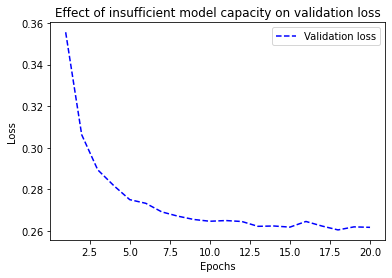

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3609 - accuracy: 0.8989 - val_loss: 0.2095 - val_accuracy: 0.9388
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1579 - accuracy: 0.9526 - val_loss: 0.1364 - val_accuracy: 0.9596
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1124 - accuracy: 0.9664 - val_loss: 0.1180 - val_accuracy: 0.9654
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9739 - val_loss: 0.1075 - val_accuracy: 0.9699
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9792 - val_loss: 0.1072 - val_accuracy: 0.9699
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0992 - val_accuracy: 0.9731
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.1083 - val_accuracy: 0.9717
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**正則化(Regularizing)：使曲線更簡單、平滑、足夠泛化**

**縮小訓練模型的體積能夠讓過度擬合的出現時間變得更晚，並且過度擬合後的泛化下降程度也更趨緩**

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5553 - accuracy: 0.7673 - val_loss: 0.4074 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3316 - accuracy: 0.8956 - val_loss: 0.3127 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2400 - accuracy: 0.9201 - val_loss: 0.2855 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1878 - accuracy: 0.9399 - val_loss: 0.2722 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1497 - accuracy: 0.9524 - val_loss: 0.2760 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1250 - accuracy: 0.9610 - val_loss: 0.2879 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1034 - accurac

**Version of the model with lower capacity**

較小的模型較晚過度擬合(訓練週期4-->6)，且過度擬合以後的驗證曲線變化也較為趨緩

<img src="https://i.imgur.com/HSI8fRa.jpg">


In [ ]:
# 模型由16x16x1縮小為4x4x1
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6687 - accuracy: 0.5694 - val_loss: 0.6437 - val_accuracy: 0.7192
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6139 - accuracy: 0.7084 - val_loss: 0.5960 - val_accuracy: 0.7650
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5630 - accuracy: 0.7737 - val_loss: 0.5552 - val_accuracy: 0.7789
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5187 - accuracy: 0.8213 - val_loss: 0.5231 - val_accuracy: 0.8349
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4828 - accuracy: 0.8565 - val_loss: 0.4977 - val_accuracy: 0.8462
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4527 - accuracy: 0.8803 - val_loss: 0.4789 - val_accuracy: 0.8562
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4270 - accuracy: 0.9000 - val_loss: 0.4651 - val_accuracy: 0.8642
Epoch 8/20
30

**Version of the model with higher capacity**

**太大的模型，過度擬合更早發生，驗證損失曲線不穩定且方差更大**

<img src="https://i.imgur.com/mIT7eB5.jpg">

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5317 - accuracy: 0.7648 - val_loss: 0.3427 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2510 - accuracy: 0.8983 - val_loss: 0.2974 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1383 - accuracy: 0.9477 - val_loss: 0.3008 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1231 - accuracy: 0.9699 - val_loss: 0.3329 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0121 - accuracy: 0.9979 - val_loss: 0.4912 - val_accuracy: 0.8794
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0509 - accuracy: 0.9941 - val_loss: 0.8740 - val_accuracy: 0.8250
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.5833 - val_accuracy: 0.8875
Epoch 8/20
30

#### Adding weight regularization

####**奧卡姆剃⼑原理(principle of Occam’s razor)**

對於某事給出兩種解釋，最有可能正確的解釋是最簡單的解釋。類推至神經網路模型，簡單的模型較複雜的模型更不容易過度擬合。

####**權重正則化(weight regularization)**

也就是權重限制法。強制給定訓練權重之上、下限，使參數訓練時不會過大或過小，使權重分布更常規性(減輕模型複雜度)，避免過度擬合情形。形式上有：
* **L1 regulation：** The cost added is proportional to the absolute value of the weight coefficients (增加的cost與權重係數**絕對值**成正比)
* **L2 regulation：** The cost added is proportional to the square of the value of the weight coefficients (增加的cost與權重係數**平方**成正比)

**Adding L2 weight regularization to the model**

`kernel_regularizer=regularizers.l2(0.002)`：將各層權重矩陣的每一個係數值增加`(0.002 * weight_coefficient_value ** 2)`至模型總損失。最終發現經L2正則化的模型更能對抗過度擬合。

<img src="https://i.imgur.com/agOAGTq.jpg">

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5872 - accuracy: 0.7932 - val_loss: 0.5008 - val_accuracy: 0.8179
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3967 - accuracy: 0.8955 - val_loss: 0.3906 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3275 - accuracy: 0.9171 - val_loss: 0.3745 - val_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2971 - accuracy: 0.9251 - val_loss: 0.3582 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2797 - accuracy: 0.9303 - val_loss: 0.3598 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2643 - accuracy: 0.9369 - val_loss: 0.3702 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2570 - accuracy: 0.9402 - val_loss: 0.3818 - val_accuracy: 0.8798
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

**使用Dropout層也能減輕過度擬合**

<img src="https://i.imgur.com/6WNCcHu.jpg">

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), # Drop out 50% 的數據
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), # Drop out 50% 的數據
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6418 - accuracy: 0.6385 - val_loss: 0.5467 - val_accuracy: 0.8446
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5401 - accuracy: 0.7496 - val_loss: 0.4549 - val_accuracy: 0.8695
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4673 - accuracy: 0.8099 - val_loss: 0.3862 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3993 - accuracy: 0.8533 - val_loss: 0.3360 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3524 - accuracy: 0.8753 - val_loss: 0.3029 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3104 - accuracy: 0.8943 - val_loss: 0.2967 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2785 - accuracy: 0.9072 - val_loss: 0.2821 - val_accuracy: 0.8854
Epoch 8/20
30

## Summary

請看本文章最頂處，我在文初做好了摘要